## Importing relevant packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Reading the data and extracting time series data

In [2]:
df = pd.read_csv('EL_Month.csv')

In [3]:
df1 = df[['Month','Series 1']]
df2 = df[['Month','Series 2']]
data1 = df1['Series 1']

In [4]:
data = pd.DataFrame(data1, columns=['Series 1'])

Train Test Split

In [5]:
train_size = int(len(data) * 0.85)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]
print(len(train), len(test))

173 31


# Converting Object Data Type into Float

In [6]:
C = []
for z in range(len(train['Series 1'])):
  a1 = train['Series 1'][z].replace(",","")
  b1 = float(a1)
  #print(b1)
  C.append(b1)

In [7]:
D = []
for z12 in range(len(train),len(train)+ len(test['Series 1'])):
  #print(z1)
  a1 = test['Series 1'][z12].replace(",","")
  b1 = float(a1)
  #print(b1)
  c1 = test['Series 1'][z12].replace(",","")
  d1 = float(a1)
  #print(d1)
  D.append(d1)

In [8]:
CD = np.append(C,D)
DC = np.append(C,D)

In [9]:
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})

In [10]:
dfnew = Data12.set_index('Month')

In [11]:
#dfnew.head()

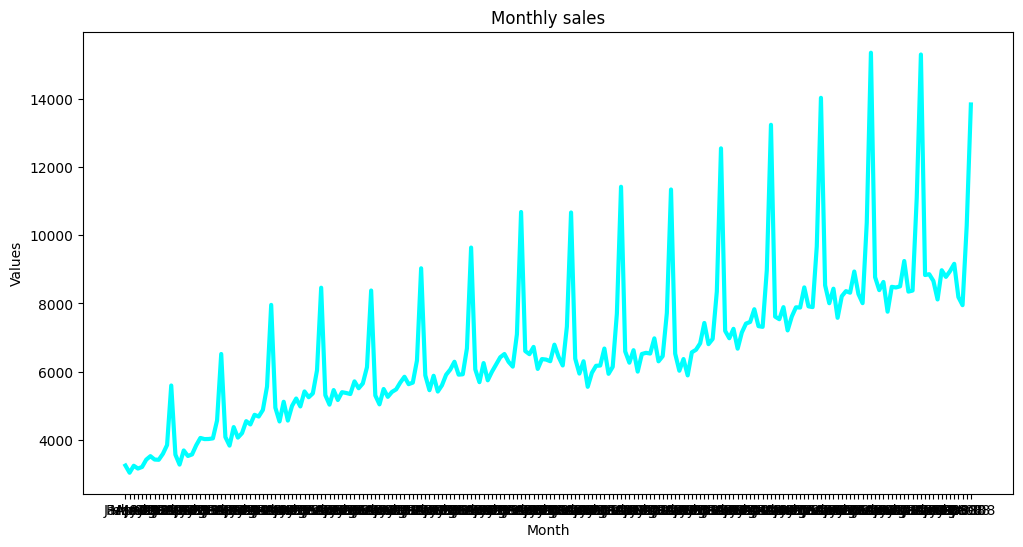

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(dfnew['Values'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Values")
plt.show()

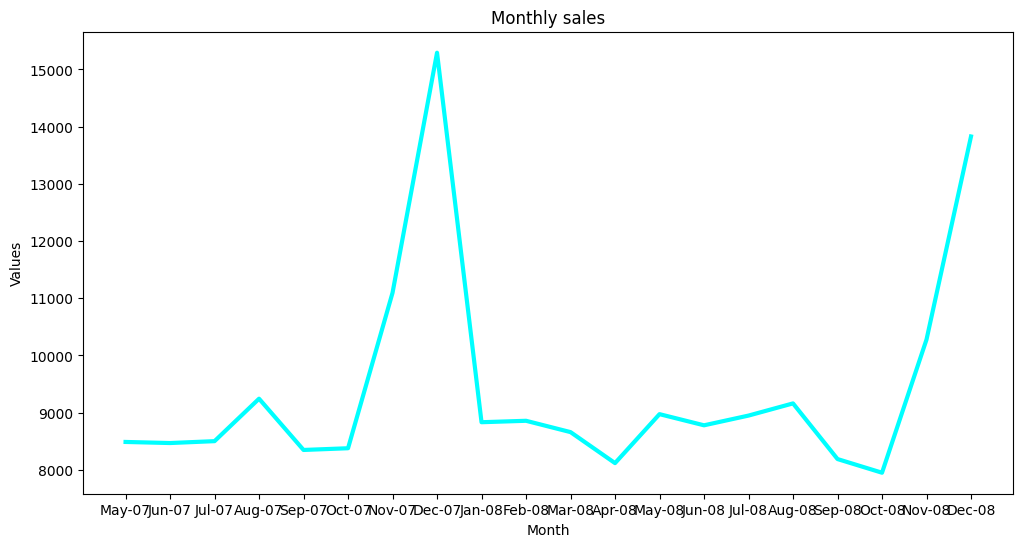

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(dfnew['Values'][len(dfnew['Values'])-20:len(dfnew['Values'])], linewidth=3,c='cyan')
#plt.plot(dfnew['Values'][1:5], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Values")
plt.show()#

In [14]:
## There seems to be a 12 timestamp seasonality

In [15]:
# len_o = len(CD)

In [16]:
# for i in range(len(CD)):
#   a_series = CD[len_o-12:len_o]
#   import statistics

#   a_mean = statistics.mean(a_series)
#   CD = np.append(CD,a_mean)
#   if len(CD) >  len_o+12:
#     break

In [17]:
#len(CD)

In [18]:
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})

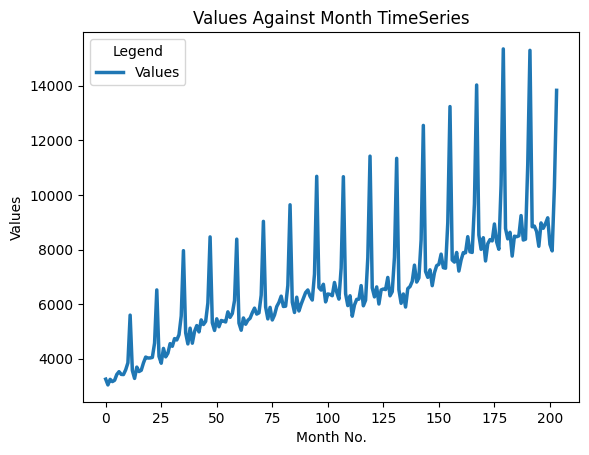

In [19]:
import seaborn as sns
sns.lineplot(data=Data12[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

In [20]:
Data3 = Data12.iloc[len(Data12)-40:len(Data12)]

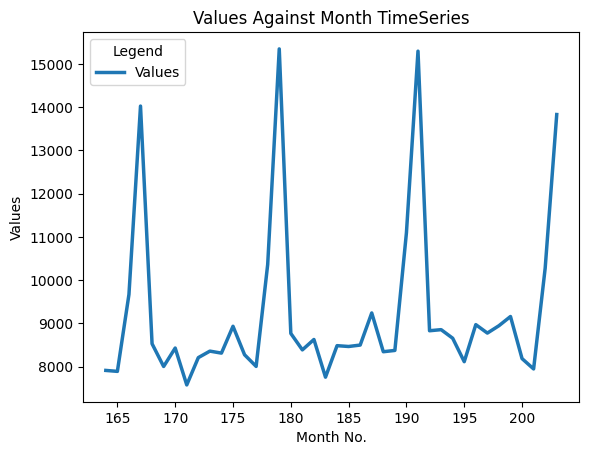

In [21]:
sns.lineplot(data=Data3[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

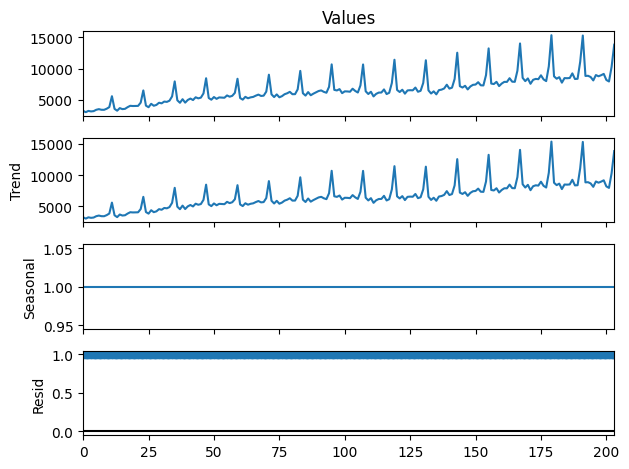

In [22]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(Data12['Values'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing grpah'}>

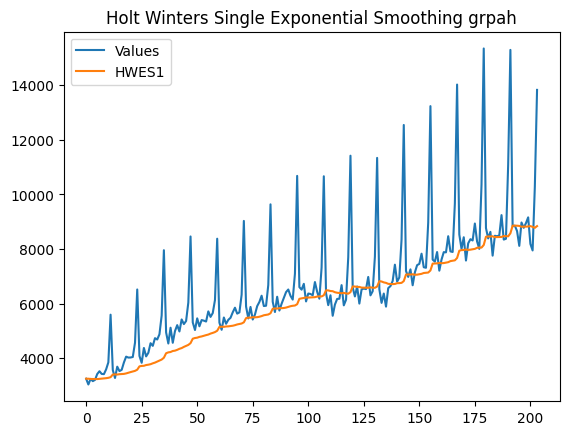

In [23]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)
# Single exponential smoothing of the visitors data set
Data12['HWES1'] = SimpleExpSmoothing(Data12['Values']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
Data12[['Values','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Holt Winters grapg: Additive Trend and Multiplicative Trend'}>

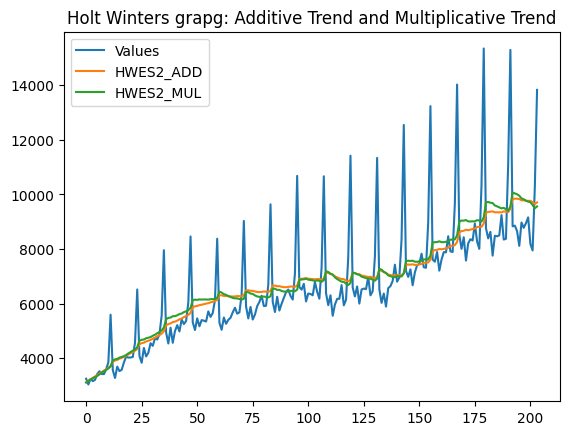

In [24]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
Data12['HWES2_ADD'] = ExponentialSmoothing(Data12['Values'],trend='add').fit().fittedvalues
Data12['HWES2_MUL'] = ExponentialSmoothing(Data12['Values'],trend='mul').fit().fittedvalues
Data12[['Values','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

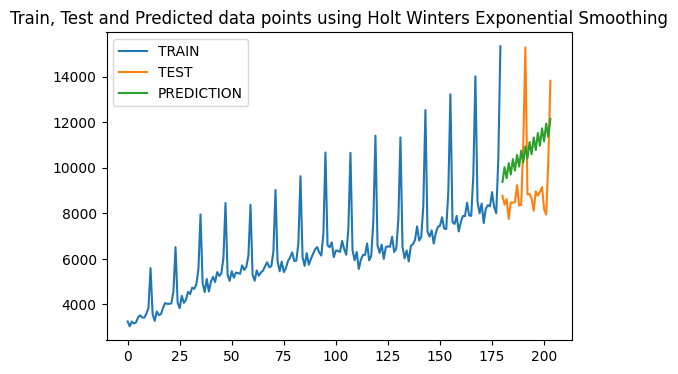

In [25]:
# Split into train and test set
train_Data12 = Data12[:180]
test_Data12 = Data12[180:]
# Fit the model
fitted_model = ExponentialSmoothing(train_Data12['Values'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(24)
train_Data12['Values'].plot(legend=True,label='TRAIN')
test_Data12['Values'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

In [26]:
## Calculating Accuracy

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mean_absolute_percentage_error(test_Data12['Values'],test_predictions)

22.456071023811646

In [29]:
Accuracy1 = 100 - mean_absolute_percentage_error(test_Data12['Values'],test_predictions)

In [30]:
acc = round(Accuracy1, 2)

In [31]:
print("Accuracy of the Holt-Winter Exponential Smoothening model :",acc , "%")

Accuracy of the Holt-Winter Exponential Smoothening model : 77.54 %
